In [336]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

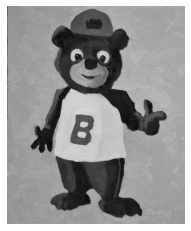

In [337]:
Bruin = imread(r"/Users/jiataoyuan/Desktop/WechatIMG214.jpeg")
plt.imshow(Bruin)
X = np.mean(Bruin,-1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis("off");

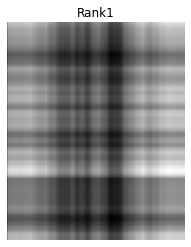

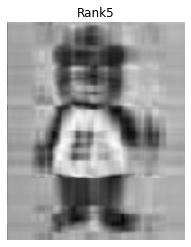

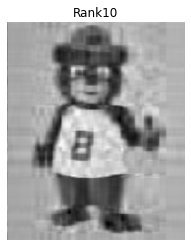

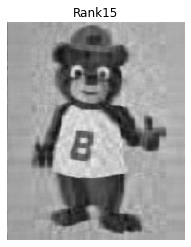

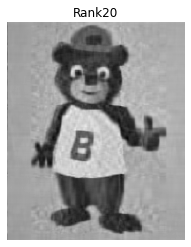

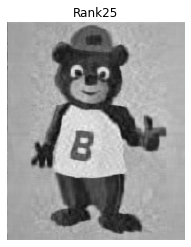

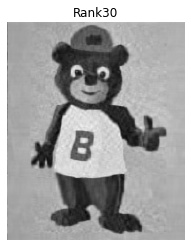

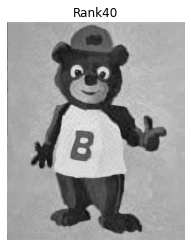

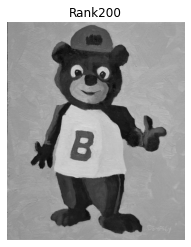

In [338]:
U,S,V_T = np.linalg.svd(X,full_matrices=False)
S1= np.diag(S)
rs = [1,5,10,15,20,25,30,40,200]
j = 0
for r in rs:
    X_new = U[:,:r]@S1[0:r,:r]@V_T[:r,:]
    plt.figure(j+1)
    j+=1
    plt.imshow(X_new)
    plt.axis('off')
    plt.title('Rank'+str(r))
    plt.set_cmap('gray')

array([[3.36531397e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.81664279e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.86707588e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.93366618e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.76598745e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.26388392e+00]])

(0.0, 50.0)

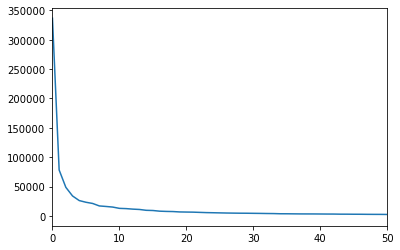

In [163]:
plt.plot(S)
plt.xlim([0,50])


In [524]:
import numpy
import glob

folders = glob.glob(r'/Users/jiataoyuan/Desktop/Extracted Faces/*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)
images = []
read_images = []        
for image in imagenames_list:
    X = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    X = X.flatten()
    read_images.append(X)


In [525]:
train_faces = np.array(read_images).T
mean = np.mean(train_faces,axis = 1)
mean = mean.reshape((-1,1))
avg_faces = train_faces- mean

In [526]:
U,S,V_T = np.linalg.svd(avg_faces,full_matrices= False)

Now Singular Value: 224862.16366663924


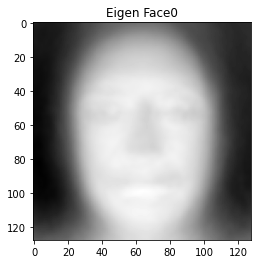

Now Singular Value: 165186.41796527887


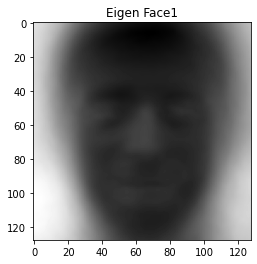

Now Singular Value: 160195.21677171573


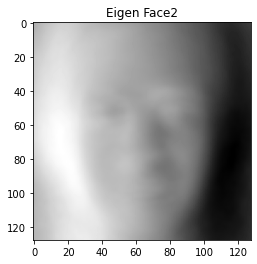

Now Singular Value: 124413.27389152593


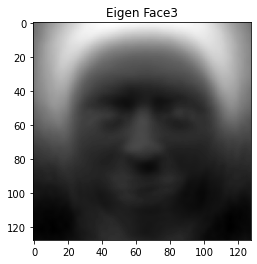

Now Singular Value: 102038.97442641396


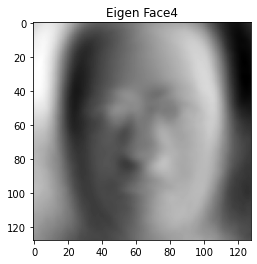

Now Singular Value: 88623.2995642759


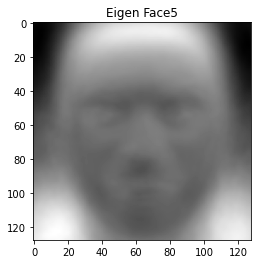

Now Singular Value: 79040.27044289774


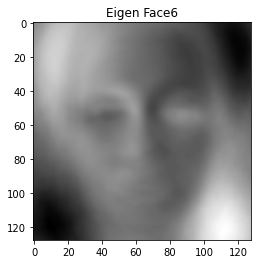

Now Singular Value: 75340.31382856506


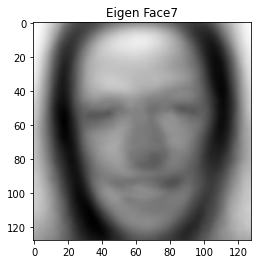

Now Singular Value: 64663.836278093695


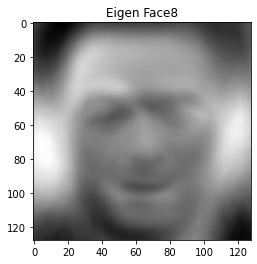

Now Singular Value: 62250.65019737508


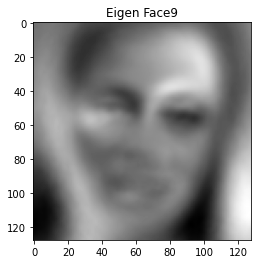

Now Singular Value: 57189.168062402285


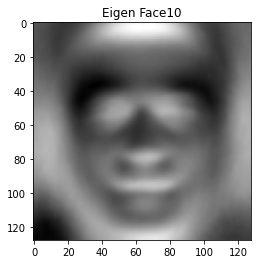

Now Singular Value: 55626.28328467478


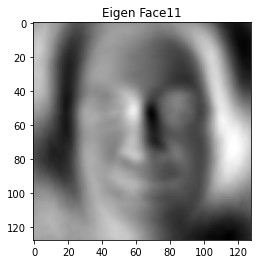

Now Singular Value: 52495.632662067925


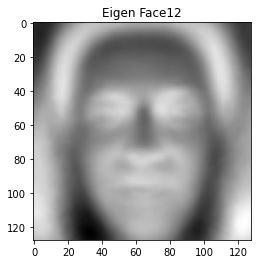

Now Singular Value: 49604.3983587274


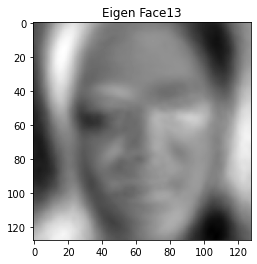

Now Singular Value: 46766.40953535667


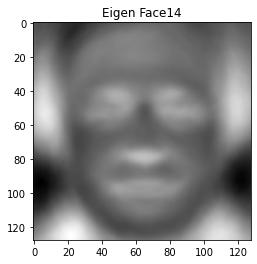

Now Singular Value: 43522.3474780676


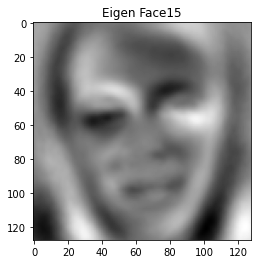

Now Singular Value: 43091.2430202944


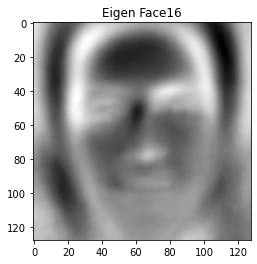

Now Singular Value: 40340.08303109407


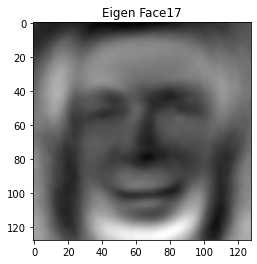

Now Singular Value: 39191.49478895135


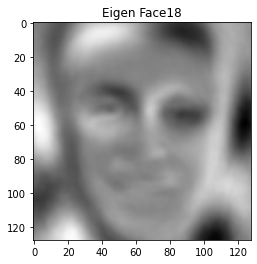

Now Singular Value: 38345.33573776801


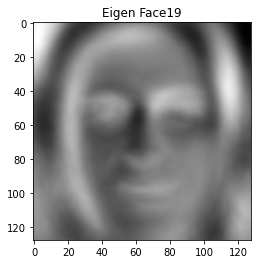

In [527]:
plt.imshow(U[:,0].reshape((128, 128)))
S1 = np.diag(S)
for j in range(20):
    print("Now Singular Value: "+str(S1[j][j]))
    plt.imshow(U[:,j].reshape((128, 128)))
    plt.title("Eigen Face"+str(j))
    plt.show()


NOW people0


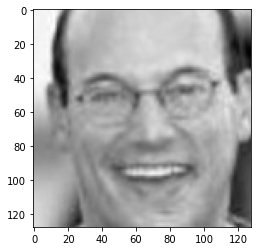

NOW people1


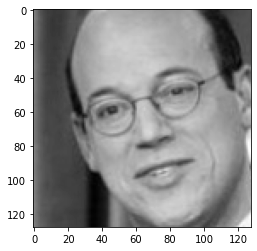

NOW people2


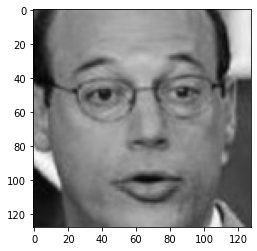

NOW people3


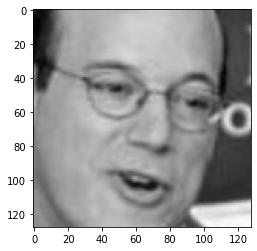

NOW people4


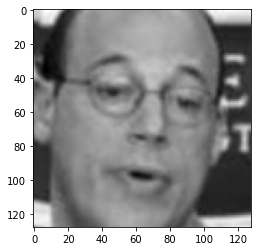

NOW people5


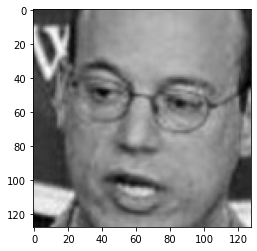

NOW people6


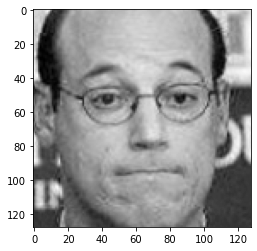

NOW people7


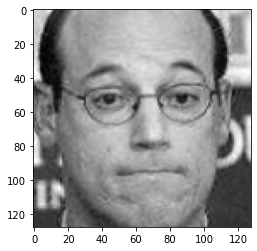

NOW people8


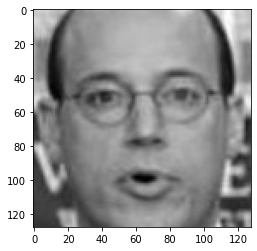

NOW people9


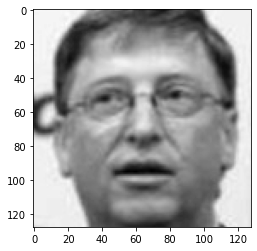

NOW people10


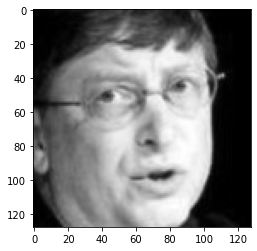

NOW people11


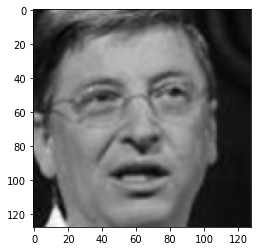

NOW people12


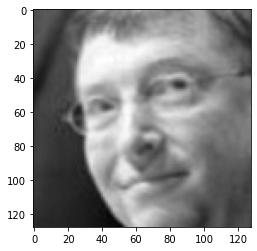

NOW people13


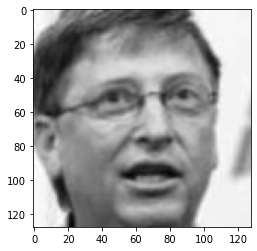

NOW people14


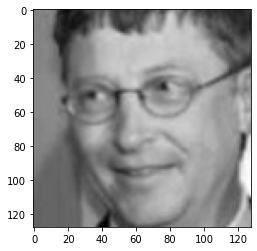

NOW people15


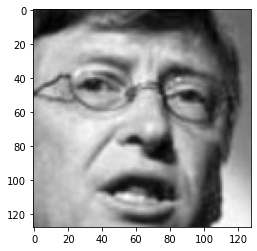

NOW people16


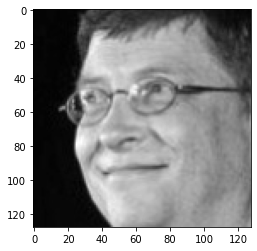

NOW people17


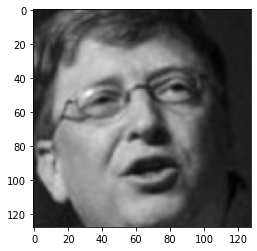

NOW people18


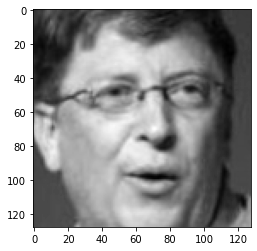

NOW people19


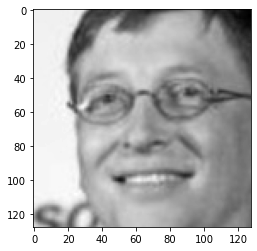

NOW people20


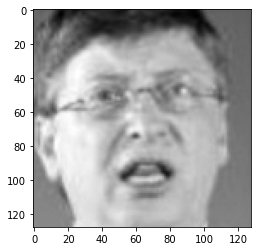

NOW people21


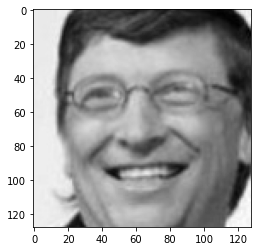

NOW people22


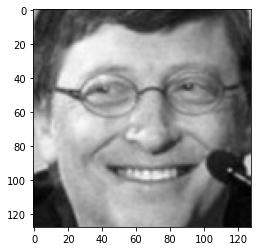

NOW people23


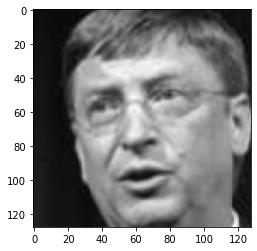

NOW people24


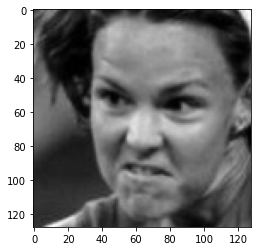

NOW people25


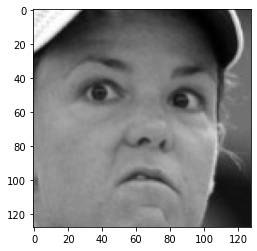

NOW people26


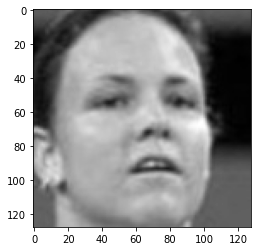

NOW people27


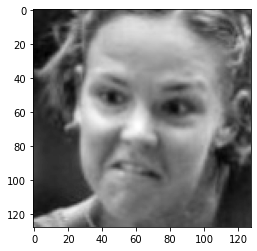

NOW people28


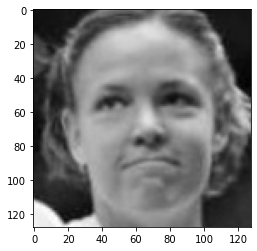

NOW people29


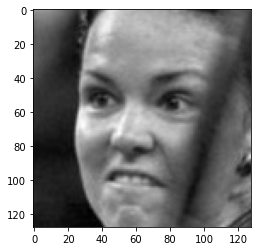

NOW people30


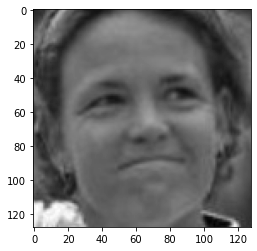

NOW people31


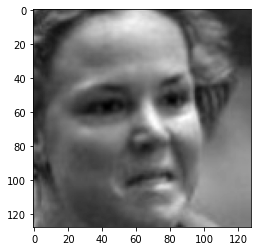

NOW people32


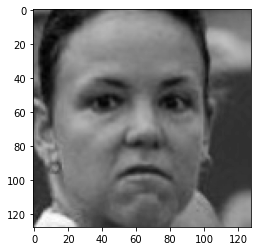

NOW people33


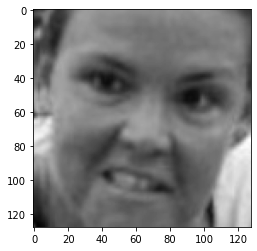

NOW people34


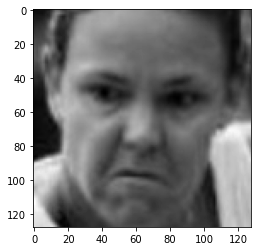

NOW people35


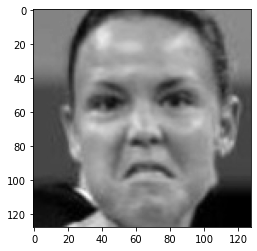

NOW people36


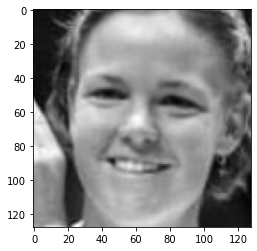

In [607]:
# Now test faces 
folders2 = glob.glob(r'/Users/jiataoyuan/Desktop/faces/*')
imagenames_list2 = []
for folder in folders2:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list2.append(f)
images2 = []
read_images2 = []        
for image in imagenames_list2:
    X = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    X = X.flatten()
    read_images2.append(X)
test_faces = np.array(read_images2).T
test_faces_avg = test_faces - mean
for i in range(len(imagenames_list2)):
    img = test_faces[:,i].reshape((128,128))
    plt.imshow(img)
    print('NOW people'+str(i))
    plt.show()

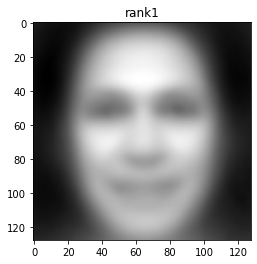

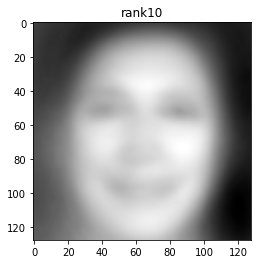

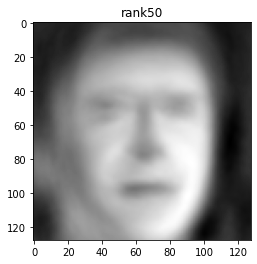

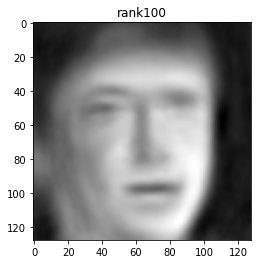

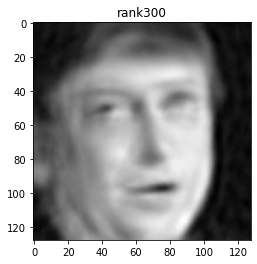

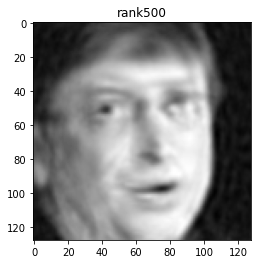

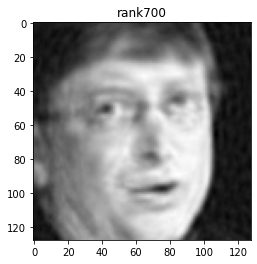

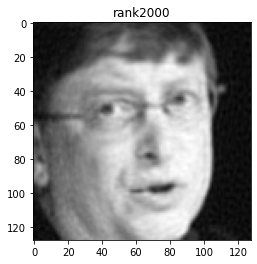

In [653]:
eigen_faces = [1,10,50,100,300,500,700,2000]
person_21 = test_faces_avg[:,10].reshape(16384,1)
for r in eigen_faces:
    new_face = mean + U[:,:r]@U[:,:r].T@person_21
    plt.imshow(new_face.reshape((128,128)))
    plt.title("rank"+str(r))
    plt.show()

(-0.5, 127.5, 127.5, -0.5)

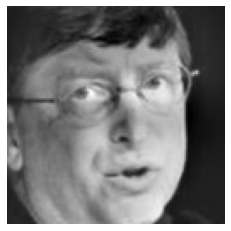

In [654]:
Bill = test_faces_avg[:,10].reshape((128,128))
plt.imshow(Bill)
plt.axis("off")

Now0th person


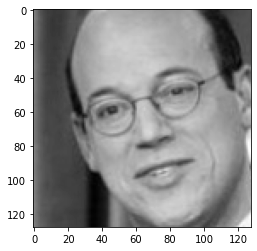

Now1th person


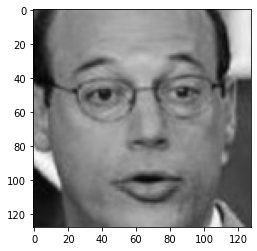

Now2th person


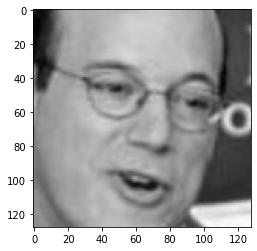

Now3th person


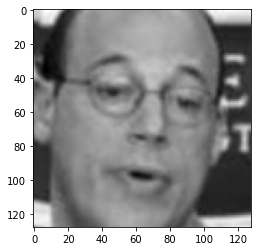

Now4th person


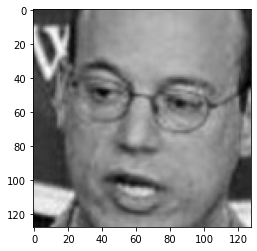

Now5th person


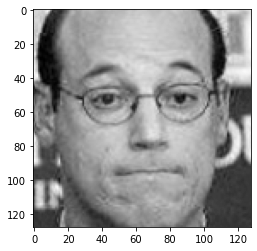

Now6th person


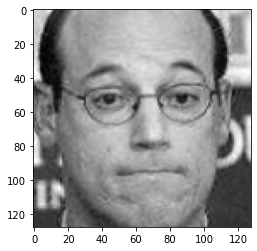

Now7th person


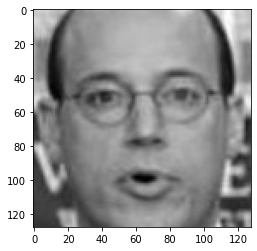

Now8th person


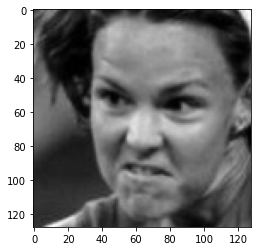

Now9th person


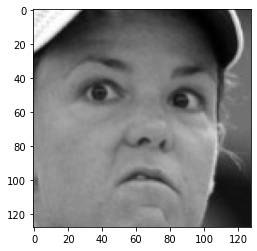

Now10th person


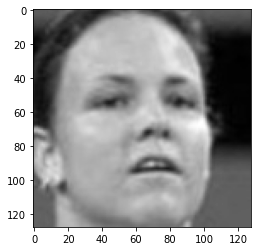

Now11th person


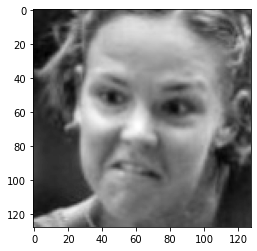

Now12th person


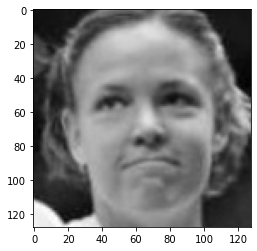

Now13th person


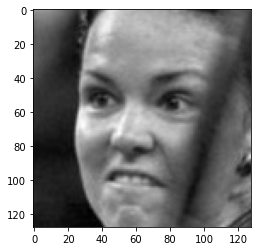

Now14th person


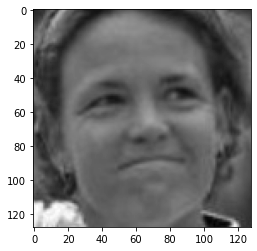

Now15th person


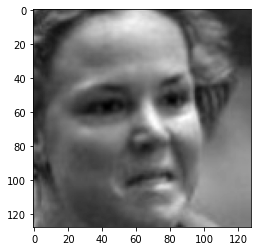

Now16th person


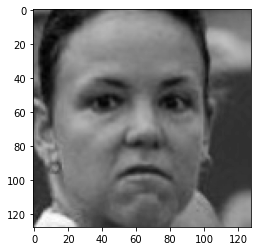

Now17th person


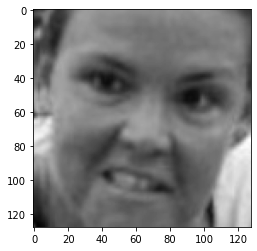

Now18th person


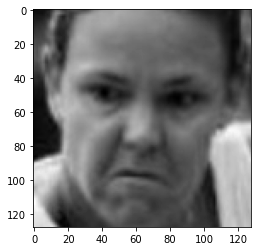

Now19th person


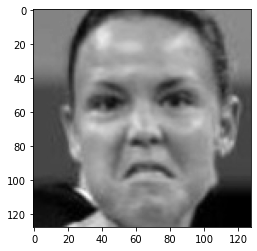

Now20th person


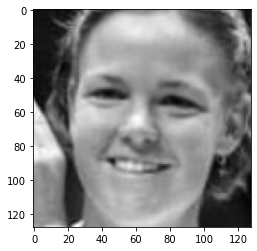

IndexError: index 21 is out of bounds for axis 1 with size 21

In [592]:
j = 60
a = test_faces[:,1:j]
for i in range(j):
    b = a[:,i]
    plt.imshow(b.reshape((128,128)))
    print("Now"+str(i)+'th person')
    plt.show()

In [605]:
i,j = 30,40
PCA_coor = [i,j]
P1 = test_faces_avg[:,0:9]
P2 = test_faces_avg[:,9:-1]
coor_P1 = U[:,5:7].T@P1
coor_P2 = U[:,5:7].T@P2
coor_P1 = coor_P1.T
coor_P2 = coor_P2.T

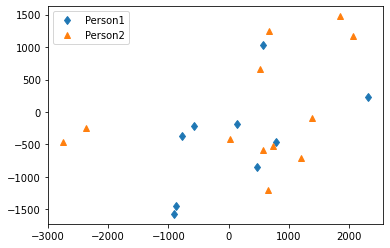

In [606]:
plt.plot(coor_P1[:,0],coor_P1[:,1],'d',label = 'Person1')
plt.plot(coor_P2[:,0],coor_P2[:,1],'^',label = 'Person2')
plt.legend()

(0.0, 800.0)

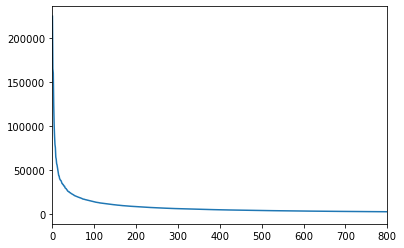

In [671]:
plt.plot((S))
plt.xlim([0,800])

(0.0, 20.0)

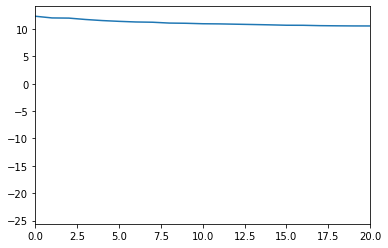

In [666]:
plt.plot(np.log(S))
plt.xlim([0,20])

In [676]:
s = sum(S)
count = 0 
for i in range(len(S)):
    count+=S[i]
    if count > 0.95*s:
        print(i)
        

3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578


5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
